In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('image_bins_stats_lungs3.csv')
data.shape

(2488, 106)

In [3]:
data.head()

,filename,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,transformed_image_covid_1.png,4722,15567,4,7683,12061,1,8864,16634,77.433079,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,transformed_image_covid_2.png,6556,13701,25,9956,9437,0,12114,13747,79.728951,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,transformed_image_covid_3.png,10512,12249,1,11502,7743,2,9619,13908,68.987348,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,transformed_image_covid_4.png,7987,11854,2,10419,11895,9,11931,11439,94.638788,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,transformed_image_covid_5.png,7761,14159,4,10898,10560,9,9153,12992,68.762015,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [4]:
data = data.drop(['filename'], axis=1)
data.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722,15567,4,7683,12061,1,8864,16634,77.433079,0.202929,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,6556,13701,25,9956,9437,0,12114,13747,79.728951,5.447851,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,10512,12249,1,11502,7743,2,9619,13908,68.987348,36.388358,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,7987,11854,2,10419,11895,9,11931,11439,94.638788,15.529948,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,7761,14159,4,10898,10560,9,9153,12992,68.762015,4.809379,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [5]:
name = ['rstd_bins0','rstd_bins1','rstd_bins2','rstd_bins3','rstd_bins4','rstd_bins5','rstd_bins6','rstd_bins7','rskew_bins0','rskew_bins1','rskew_bins2','rskew_bins3','rskew_bins4','rskew_bins5','rskew_bins6','rskew_bins7','gstd_bins0','gstd_bins1','gstd_bins2','gstd_bins3','gstd_bins4','gstd_bins5','gstd_bins6','gstd_bins7','bstd_bins0','bstd_bins1','bstd_bins2','bstd_bins3','bstd_bins4','bstd_bins5','bstd_bins6','bstd_bins7','gskew_bins0','gskew_bins1','gskew_bins2','gskew_bins3','gskew_bins4','gskew_bins5','gskew_bins6','gskew_bins7','bskew_bins0','bskew_bins1','bskew_bins2','bskew_bins3','bskew_bins4','bskew_bins5','bskew_bins6','bskew_bins7','class']
for i in name:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [6]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722.0,15567.0,4.0,7683.0,12061.0,1.0,8864.0,16634.0,77.433079,0.202929,...,29.266700,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0.0
1,6556.0,13701.0,25.0,9956.0,9437.0,0.0,12114.0,13747.0,79.728951,5.447851,...,33.538220,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0.0
2,10512.0,12249.0,1.0,11502.0,7743.0,2.0,9619.0,13908.0,68.987348,36.388358,...,25.225216,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0.0
3,7987.0,11854.0,2.0,10419.0,11895.0,9.0,11931.0,11439.0,94.638788,15.529948,...,34.516185,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0.0
4,7761.0,14159.0,4.0,10898.0,10560.0,9.0,9153.0,12992.0,68.762015,4.809379,...,32.137213,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,9870.0,10436.0,13.0,9558.0,9764.0,0.0,16080.0,9815.0,104.708207,27.440974,...,28.826381,16.609479,32.541509,10.841782,18.263777,29.591836,0.000000,43.584547,43.219779,1.0
2484,5946.0,14026.0,1.0,11041.0,12415.0,0.0,7886.0,14221.0,74.044736,1.607016,...,39.246127,30.936390,21.337923,0.000000,9.706518,17.877323,0.000000,45.339391,32.611797,1.0
2485,7330.0,8408.0,6.0,10811.0,18521.0,2.0,6699.0,13759.0,112.515416,7.136774,...,28.790502,42.515393,18.625921,11.891740,14.170267,3.991819,0.000000,36.311970,41.914116,1.0
2486,7630.0,16431.0,1.0,9530.0,3413.0,3.0,17843.0,10685.0,73.122412,24.310145,...,37.426827,20.622111,29.148814,0.000000,20.197666,31.678731,4.769168,50.967873,38.781249,1.0


In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1735, 104), (744, 104))

In [8]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(X_train, y_train)

univariate

(array([1.79578327e+02, 1.38423129e+01, 3.66421700e+01, 4.23093473e+00,
        1.57814257e+02, 2.57463276e+01, 7.99464883e+00, 1.63845604e-02,
        4.73948424e+00, 9.94726843e+01, 1.97686513e-01, 2.91455185e+01,
        1.70838834e+01, 1.99558471e+02, 7.80603698e+00, 3.04065503e+01,
        1.91660370e+00, 2.24344505e+01, 7.76399942e+01, 7.88771736e+00,
        2.82202349e+01, 1.76159983e+02, 2.89958138e+02, 7.28407274e+00,
        2.40678538e+00, 2.85260850e+01, 8.26694594e+01, 2.86133829e+00,
        2.85660271e+01, 1.80041939e+02, 2.84364689e+02, 9.79116527e+00,
        6.07598275e+00, 3.74040829e+01, 7.87208028e+01, 1.68497679e+00,
        3.43970150e+01, 1.81394500e+02, 1.99082033e+02, 1.67905722e+01,
        3.37050911e+01, 1.48667682e+01, 4.03537968e+00, 1.83254975e+01,
        1.24915904e+02, 1.23276292e+01, 7.53652307e+00, 1.00249143e+01,
        6.49434160e+01, 4.16266415e+01, 6.81095264e+01, 4.99846904e+01,
        3.84341692e+01, 1.15589619e+02, 1.27491789e+02, 1.447769

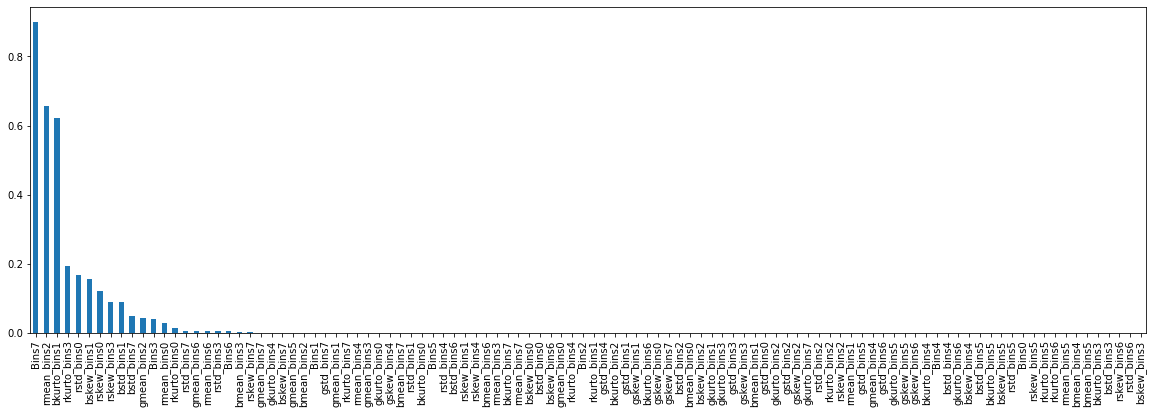

In [9]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

In [10]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['Bins0', 'Bins4', 'rmean_bins5', 'rstd_bins5', 'rstd_bins6',
       'rskew_bins5', 'rskew_bins6', 'rkurto_bins5', 'rkurto_bins6',
       'gkurto_bins6', 'bmean_bins4', 'bmean_bins5', 'bstd_bins3',
       'bstd_bins4', 'bstd_bins5', 'bskew_bins3', 'bskew_bins4', 'bskew_bins5',
       'bkurto_bins3', 'bkurto_bins5'],
      dtype='object')

In [11]:
# I keep a copy of the dataset with all the variables
# to compare the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [12]:
# find and remove correlated features
def correlation(dataset, threshold):
    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    return col_corr


corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  36


In [13]:
# remove correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1735, 68), (744, 68))

In [14]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [15]:
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# capture selected feature names
features_to_keep = X_train.columns[sel_.get_support()]

# select features
X_train_anova = sel_.transform(X_train)
X_test_anova = sel_.transform(X_test)

# numpy array to dataframe
X_train_anova = pd.DataFrame(X_train_anova)
X_train_anova.columns = features_to_keep

X_test_anova = pd.DataFrame(X_test_anova)
X_test_anova.columns = features_to_keep

X_train_anova.shape, X_test_anova.shape

((1735, 20), (744, 20))

In [16]:
# create a function to build random forests and
# compare its performance in train and test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
import matplotlib.pyplot as plt

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    y_pred = rf.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [17]:
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9492984445928084
Test set
Random Forests roc-auc: 0.9196219035202087
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       354
           1       0.84      0.86      0.85       390

    accuracy                           0.84       744
   macro avg       0.84      0.84      0.84       744
weighted avg       0.84      0.84      0.84       744

Confusion Matrix:
[[292  62]
 [ 54 336]]
Metrics:
Accuracy: 0.844
F1 Score: 0.853
Precision: 0.844
Recall: 0.862
After Cross Validation:
Accuracy: 84.03 %
Standard Deviation: 2.01 %


In [18]:
# filter methods - univariate roc-auc
run_randomForests(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9354389380008956
Test set
Random Forests roc-auc: 0.9115167318557148
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       354
           1       0.83      0.84      0.83       390

    accuracy                           0.83       744
   macro avg       0.83      0.82      0.82       744
weighted avg       0.83      0.83      0.83       744

Confusion Matrix:
[[286  68]
 [ 62 328]]
Metrics:
Accuracy: 0.825
F1 Score: 0.835
Precision: 0.828
Recall: 0.841
After Cross Validation:
Accuracy: 83.23 %
Standard Deviation: 1.89 %


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    logit.fit(X_train, y_train)
    
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = logit.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [20]:
run_logistic(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8680357252980907
Test set
Logistic Regression roc-auc: 0.8687454729827612
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       354
           1       0.90      0.92      0.91       390

    accuracy                           0.90       744
   macro avg       0.91      0.90      0.90       744
weighted avg       0.90      0.90      0.90       744

Confusion Matrix:
[[313  41]
 [ 30 360]]
Metrics:
Accuracy: 0.905
F1 Score: 0.910
Precision: 0.898
Recall: 0.923
After Cross Validation:
Accuracy: 92.45 %
Standard Deviation: 1.73 %


In [21]:
run_logistic(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.878821150963784
Test set
Logistic Regression roc-auc: 0.8606982471389251
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       354
           1       0.82      0.84      0.83       390

    accuracy                           0.82       744
   macro avg       0.82      0.82      0.82       744
weighted avg       0.82      0.82      0.82       744

Confusion Matrix:
[[280  74]
 [ 62 328]]
Metrics:
Accuracy: 0.817
F1 Score: 0.828
Precision: 0.816
Recall: 0.841
After Cross Validation:
Accuracy: 81.96 %
Standard Deviation: 2.01 %


In [23]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_kernel_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [24]:
run_kernel_SVM(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.7716104001265561
Test set
Kernel SVM roc-auc: 0.7870563523105896
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       354
           1       0.66      0.82      0.73       390

    accuracy                           0.69       744
   macro avg       0.70      0.68      0.68       744
weighted avg       0.69      0.69      0.68       744

Confusion Matrix:
[[190 164]
 [ 70 320]]
Metrics:
Accuracy: 0.685
F1 Score: 0.732
Precision: 0.661
Recall: 0.821
After Cross Validation:
Accuracy: 69.22 %
Standard Deviation: 4.13 %


In [25]:
run_kernel_SVM(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.8046946430821783
Test set
Kernel SVM roc-auc: 0.8189482833550631
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       354
           1       0.68      0.79      0.73       390

    accuracy                           0.69       744
   macro avg       0.70      0.69      0.69       744
weighted avg       0.70      0.69      0.69       744

Confusion Matrix:
[[206 148]
 [ 80 310]]
Metrics:
Accuracy: 0.694
F1 Score: 0.731
Precision: 0.677
Recall: 0.795
After Cross Validation:
Accuracy: 67.55 %
Standard Deviation: 3.19 %


In [26]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.neighbors import KNeighborsClassifier

def run_knn(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [27]:
run_knn(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
KNN roc-auc: 0.5
Test set
KNN roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       354
           1       0.78      0.74      0.76       390

    accuracy                           0.75       744
   macro avg       0.75      0.75      0.75       744
weighted avg       0.75      0.75      0.75       744

Confusion Matrix:
[[271  83]
 [102 288]]
Metrics:
Accuracy: 0.751
F1 Score: 0.757
Precision: 0.776
Recall: 0.738
After Cross Validation:
Accuracy: 75.45 %
Standard Deviation: 2.01 %


In [28]:
run_knn(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
KNN roc-auc: 0.5
Test set
KNN roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       354
           1       0.69      0.73      0.71       390

    accuracy                           0.69       744
   macro avg       0.69      0.69      0.69       744
weighted avg       0.69      0.69      0.69       744

Confusion Matrix:
[[228 126]
 [106 284]]
Metrics:
Accuracy: 0.688
F1 Score: 0.710
Precision: 0.693
Recall: 0.728
After Cross Validation:
Accuracy: 64.72 %
Standard Deviation: 3.00 %


In [29]:
from sklearn.tree import DecisionTreeClassifier


def run_decision_tree(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(X_train)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(X_test)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [30]:
run_decision_tree(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Decision Tree roc-auc: 1.0
Test set
Decision Tree roc-auc: 0.813168187744459
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       354
           1       0.81      0.84      0.83       390

    accuracy                           0.81       744
   macro avg       0.81      0.81      0.81       744
weighted avg       0.81      0.81      0.81       744

Confusion Matrix:
[[278  76]
 [ 62 328]]
Metrics:
Accuracy: 0.815
F1 Score: 0.826
Precision: 0.812
Recall: 0.841
After Cross Validation:
Accuracy: 81.21 %
Standard Deviation: 1.55 %


In [31]:
run_decision_tree(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Decision Tree roc-auc: 1.0
Test set
Decision Tree roc-auc: 0.8251412429378531
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       354
           1       0.85      0.80      0.83       390

    accuracy                           0.82       744
   macro avg       0.82      0.83      0.82       744
weighted avg       0.83      0.82      0.82       744

Confusion Matrix:
[[301  53]
 [ 78 312]]
Metrics:
Accuracy: 0.824
F1 Score: 0.826
Precision: 0.855
Recall: 0.800
After Cross Validation:
Accuracy: 80.05 %
Standard Deviation: 3.20 %


In [32]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.naive_bayes import GaussianNB

def run_naive_bayes(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [33]:
run_naive_bayes(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.5
Test set
Kernel SVM roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       354
           1       0.72      0.89      0.80       390

    accuracy                           0.76       744
   macro avg       0.78      0.76      0.76       744
weighted avg       0.78      0.76      0.76       744

Confusion Matrix:
[[221 133]
 [ 44 346]]
Metrics:
Accuracy: 0.762
F1 Score: 0.796
Precision: 0.722
Recall: 0.887
After Cross Validation:
Accuracy: 74.58 %
Standard Deviation: 2.76 %


In [34]:
run_naive_bayes(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.32174620666725656
Test set
Kernel SVM roc-auc: 0.34343039258293495
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.53      0.65       354
           1       0.68      0.92      0.78       390

    accuracy                           0.73       744
   macro avg       0.77      0.72      0.72       744
weighted avg       0.76      0.73      0.72       744

Confusion Matrix:
[[186 168]
 [ 31 359]]
Metrics:
Accuracy: 0.733
F1 Score: 0.783
Precision: 0.681
Recall: 0.921
After Cross Validation:
Accuracy: 72.56 %
Standard Deviation: 3.43 %


In [35]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_linear_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
run_linear_SVM(X_train_original,
                  X_test_original,
                  y_train, y_test)

In [ ]:
run_linear_SVM(X_train_anova,
                  X_test_anova,
                  y_train, y_test)